In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [24]:
data = pd.read_csv('../../#task1-datacollection/datasets/international_Cyclones.csv')
data = data.dropna()
data.head()

,#/Date,Time\n(UTC),Latitude,Longitude,Max\nWinds\n(kts),SS\nHWS,Central\nPressure\n(mb),Landfall\nCountry,Storm\nNames
1,2-8/28/1983,1725Z,25.4N,97.4W,70.0,1.0,986.0,Mexico,Barry
2,11-11/19/1985,0600Z,22.1N,78.4W,95.0,2.0,968.0,Cuba,Kate
3,6-9/23/1987,0300Z,18.3N,71.0W,95.0,2.0,965.0,Dom. Republic,Emily
4,6-9/25/1987,1145Z,32.3N,64.7W,75.0,1.0,974.0,Bermuda,Emily
5,4-9/3/1988,0000Z,20.7N,97.3W,65.0,1.0,991.0,Mexico,Debby


In [25]:
le = preprocessing.LabelEncoder()
data['Landfall\nCountry'] = le.fit_transform(data['Landfall\nCountry'])
data['Storm\nNames'] = le.fit_transform(data['Storm\nNames'])
data.head()

,#/Date,Time\n(UTC),Latitude,Longitude,Max\nWinds\n(kts),SS\nHWS,Central\nPressure\n(mb),Landfall\nCountry,Storm\nNames
1,2-8/28/1983,1725Z,25.4N,97.4W,70.0,1.0,986.0,17,2
2,11-11/19/1985,0600Z,22.1N,78.4W,95.0,2.0,968.0,9,38
3,6-9/23/1987,0300Z,18.3N,71.0W,95.0,2.0,965.0,10,13
4,6-9/25/1987,1145Z,32.3N,64.7W,75.0,1.0,974.0,5,13
5,4-9/3/1988,0000Z,20.7N,97.3W,65.0,1.0,991.0,17,8


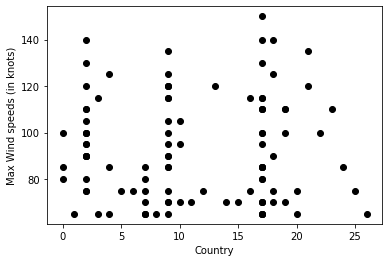

In [32]:
X = data[["Landfall\nCountry", "Max\nWinds\n(kts)"]]
plt.scatter(X["Landfall\nCountry"], X["Max\nWinds\n(kts)"], c='black')
plt.xlabel("Country")
plt.ylabel("Max Wind speeds (in knots)")
plt.show()

In [33]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
Kmean.cluster_centers_

array([[  9.03333333,  92.33333333],
       [ 18.0952381 ,  71.42857143],
       [ 11.61538462, 114.61538462],
       [ 12.875     , 137.5       ],
       [  6.        ,  70.90909091]])

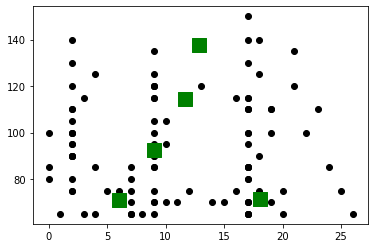

In [36]:
plt.scatter(X["Landfall\nCountry"], X["Max\nWinds\n(kts)"], c='black')
for center in Kmean.cluster_centers_:
    plt.scatter(center[0], center[1], s=200, c='g', marker='s')
plt.show()    